To see python package, here is the [github link](https://github.com/syntaxshill/decision_tree).

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import tree
from matplotlib.pyplot import figure
from dtreeviz.trees import dtreeviz

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X_pd = pd.DataFrame(X, columns=iris.feature_names)
y_pd = pd.DataFrame(y)

In [8]:
X_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
def prep_data(X_pd, y_pd):
    '''Take two dataframes, and convert to numpy and do train test split'''
    
    X = X_pd.to_numpy()
    y = y_pd.to_numpy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=.25, random_state=42)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test 

In [12]:
X_train, X_test, y_train, y_test = prep_data(X_pd, y_pd)

(112, 4) (38, 4) (112, 1) (38, 1)


In [19]:
def fit_decision_tree(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    
    print("Depth: ", dt.get_depth())
    print("Number of leaves: ", dt.get_n_leaves())
    
    return dt

In [20]:
dt = fit_decision_tree(X_train, y_train)

Depth:  6
Number of leaves:  10


In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
def visualize_tree(dt, data, type=0):
    
    if type == 0:
        fig = figure(figsize=(25,20))
        _ = tree.plot_tree(dt, feature_names=data.feature_names, 
                           class_names=data.target_names,
                          filled=True)
        
    if type == 1:
        viz = dtreeviz(dt, data.data, data.target,
                       target_name='target',
                       feature_names=data.feature_names, 
                       class_names=data.target_names.tolist()
                      )
        viz.view()

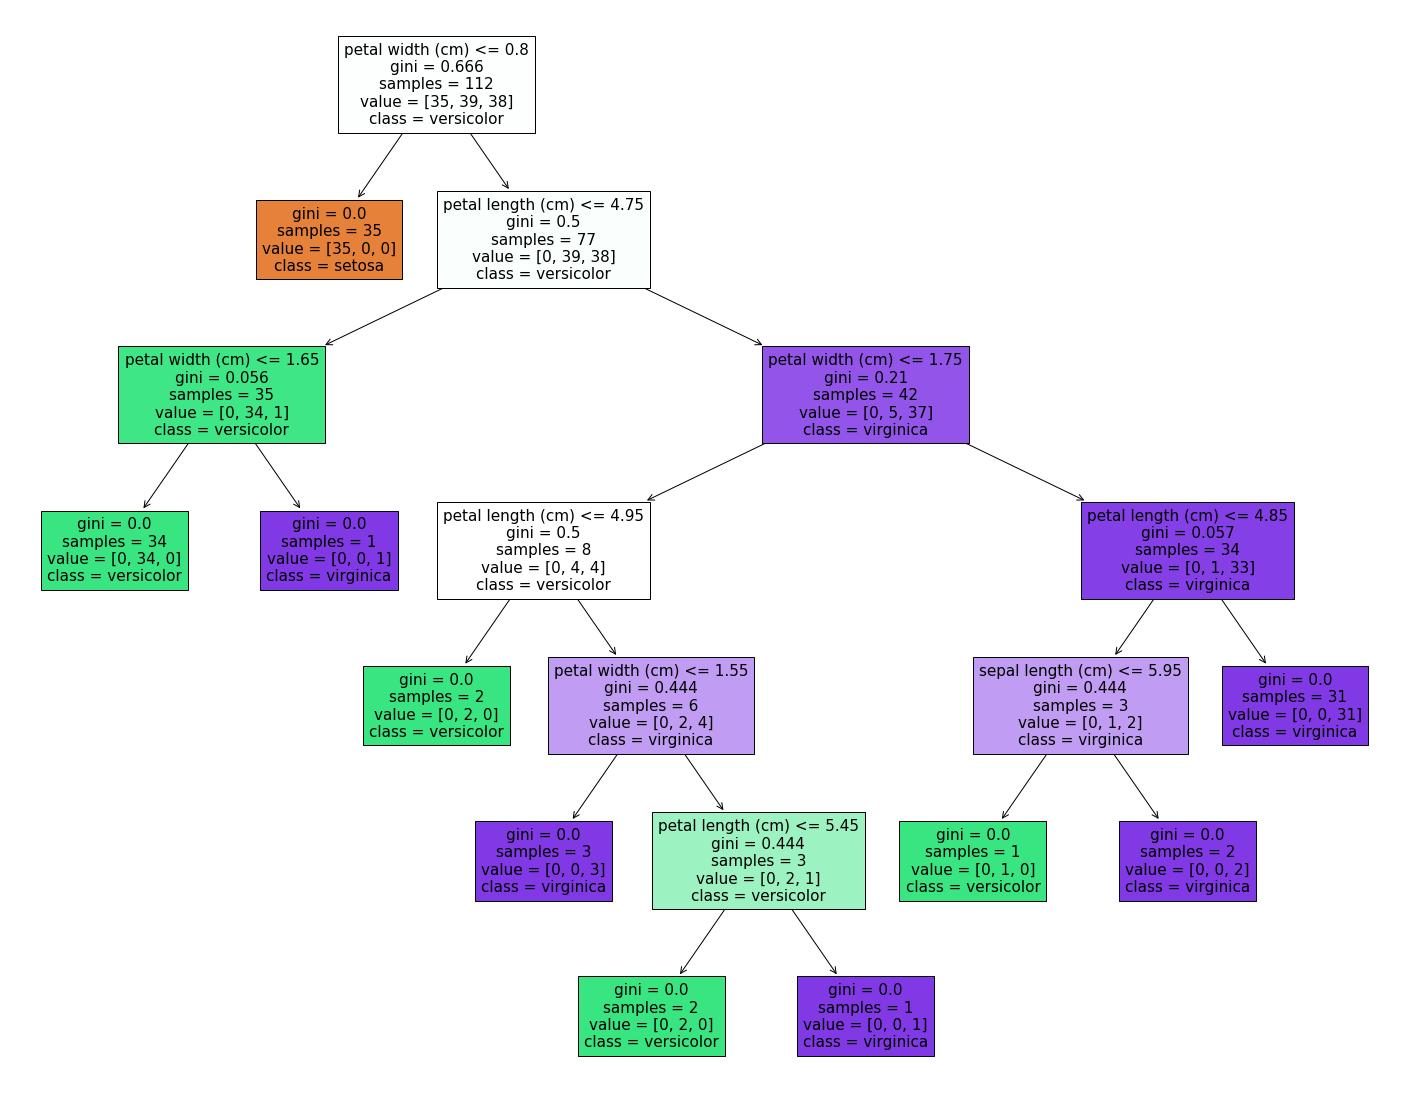

In [24]:
visualize_tree(dt, iris)

In [ ]:
visualize_tree(dt, iris, type=1)

In [34]:
def evaluate(dt, X_test, y_test):
    print("Score: ", dt.score(X_test, y_test))
    plot_confusion_matrix(dt, X_test, y_test)

Score:  1.0


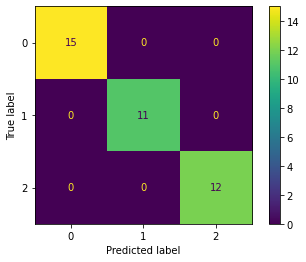

In [35]:
evaluate(dt, X_test, y_test)